We will be looking to demonstrate how Bayesian Inferences work with an example. We will have a prior belief that when we roll a die, there is a $\frac{1}{2}$ chance that the die will be a prime number and $\frac{1}{2}$ chance that it will be anything else. We will first look to model this in a PDF and then roll a dice and get some results. We will use these results to update the prior beliefs to get our posterior beliefs based on the data.

In [ ]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will first graph our prior belief. Since we believe there is a $\frac{1}{2}$ chance that the dice roll will be a prime and $\frac{1}{2}$ chance that it will not, we will use $\alpha$ and $\beta$ values that $\alpha = \beta$.

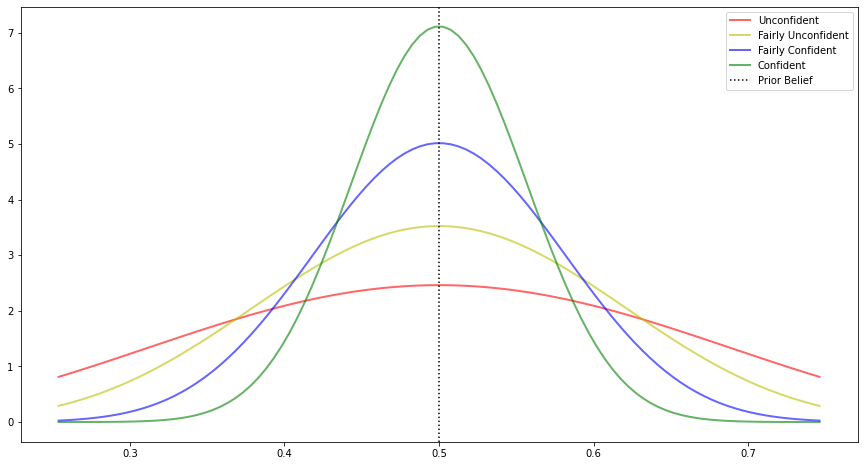

In [ ]:
alphaV, betaV = 20, 20
alphaV1, betaV1 = 5, 5
alphaV2, betaV2 = 10, 10
alphaV3, betaV3 = 40, 40
plt.figure(figsize = (15, 8))
x = np.linspace(beta.ppf(0.01, alphaV2, betaV2), beta.ppf(0.99, alphaV2, betaV2), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV1, betaV1)
y3 = beta.pdf(x, alphaV2, betaV2)
y4 = beta.pdf(x, alphaV3, betaV3)
plt.plot(x, y2, 'r-', lw=2, alpha=0.6, label="Unconfident")
plt.plot(x, y3, 'y-', lw=2, alpha=0.6, label="Fairly Unconfident")
plt.plot(x, y1, 'b-', lw=2, alpha=0.6, label="Fairly Confident")
plt.plot(x, y4, 'g-', lw=2, alpha=0.6, label="Confident")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.legend(loc="upper right")
plt.show()

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['dataDiceRoll.csv']))
df

Saving dataDiceRoll.csv to dataDiceRoll.csv


,Unnamed: 0,Dice Roll Result,Prime or Not
0,0,1,False
1,1,5,True
2,2,2,True
3,3,4,False
4,4,6,False
...,...,...,...
95,95,2,True
96,96,3,True
97,97,6,False
98,98,5,True


In [ ]:
numPrime = sum([1 for a in df['Prime or Not'] if a == True])
numNotPrime = sum([1 for a in df['Prime or Not'] if a == False])
numPrime, numNotPrime

(55, 45)

Now that we have done some trials and found that there are $55$ rolls out of the $100$ total that were prime, a bit different from the original $\frac{1}{2} = 50\%$ that was the prior belief. We use this to update the prior beliefs to get the posterior. We will model our distribution for the dice roll data as a Bernoulli distribution since there are only two outcomes, prime or not prime. (Source: MIT OpenCourseWare)

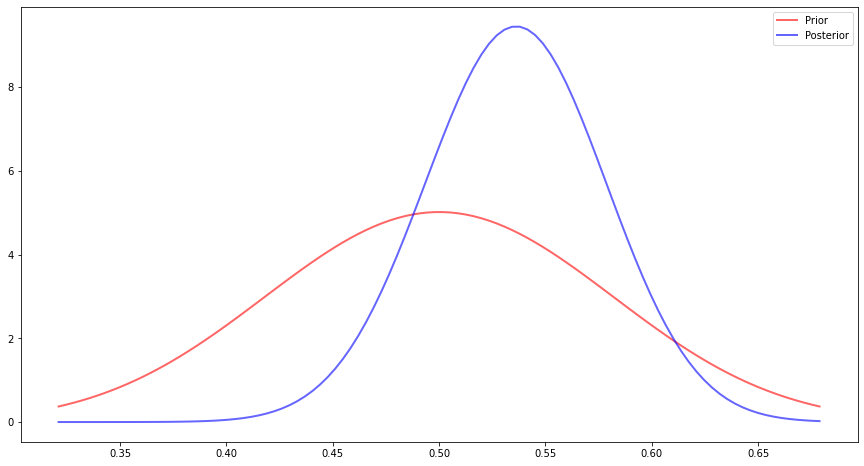

In [ ]:
alphaV, betaV = 20, 20
plt.figure(figsize = (15, 8))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Prior")
plt.plot(x, y2, 'b-', lw=2, alpha=0.6, label="Posterior")
plt.legend(loc="upper right")
plt.show()

We can always have a different weight of importance on the data (which we can use as new evidence that can be used to update our prior beliefs). Realistically, some people may have a very strong belief already and would not budge their beliefs even with new evidence showing otherwise. We can see the variations of the weights as shown in the following graph:

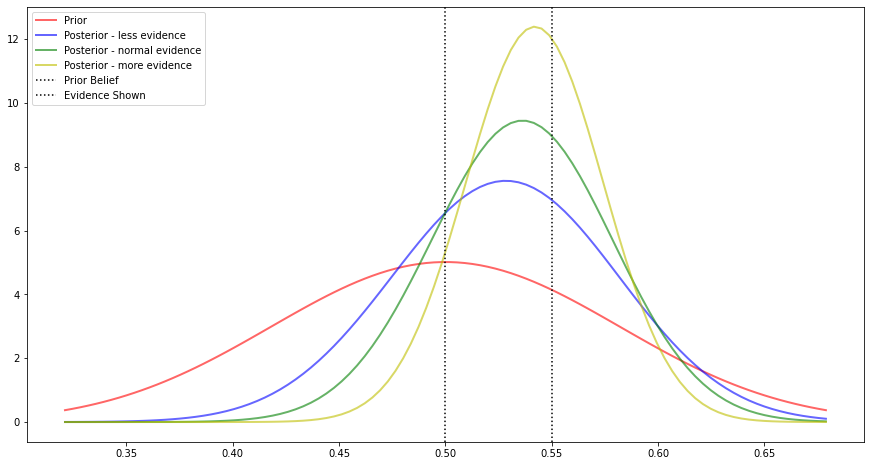

In [ ]:
alphaV, betaV = 20, 20
plt.figure(figsize = (15, 8))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper left")
plt.show()

We will now see an array of graphs to see how the differing priors and differing weights on the evidence shown has on the posterior. From the graphs shown below, we can see that the one who is most swayed by the evidence shown, the one with the least confidence in their prior beliefs, has their peak of their pdf closest to the evidence.

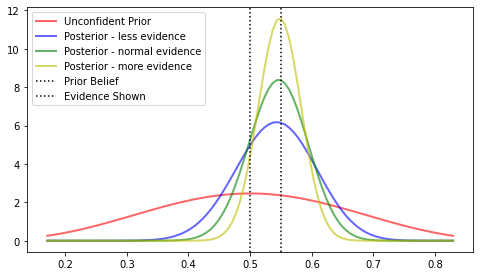

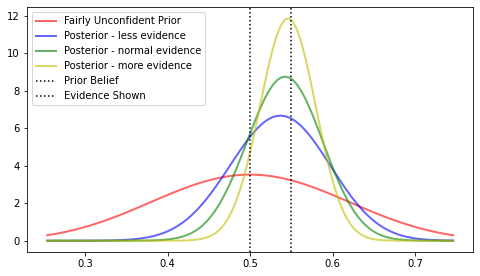

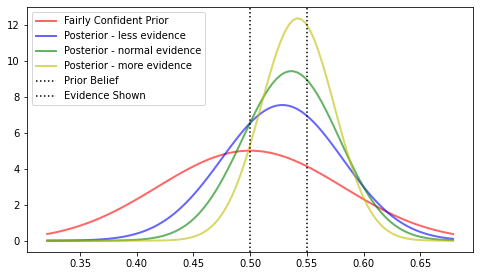

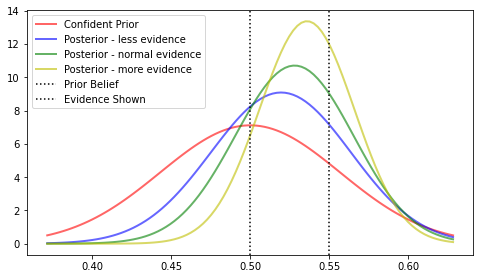

In [ ]:
alphaV, betaV = 5, 5
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Unconfident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper left")
plt.show()

alphaV, betaV = 10, 10
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Fairly Unconfident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper left")
plt.show()

alphaV, betaV = 20, 20
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Fairly Confident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper left")
plt.show()

alphaV, betaV = 40, 40
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(0.99, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Confident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.5, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper left")
plt.show()

To see this more extremely, take a look at the graphs below. These one model the data when one's prior distribution has a peak at $0.2$. The graphs show the dynamicness of this statistical approach.

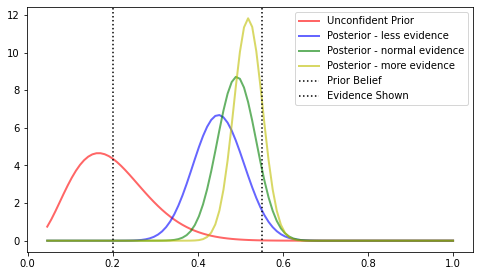

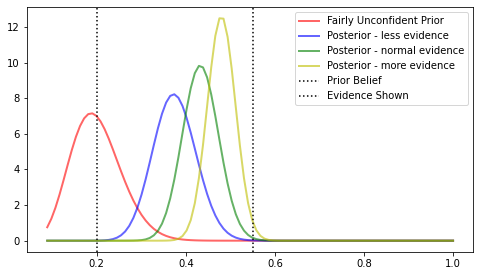

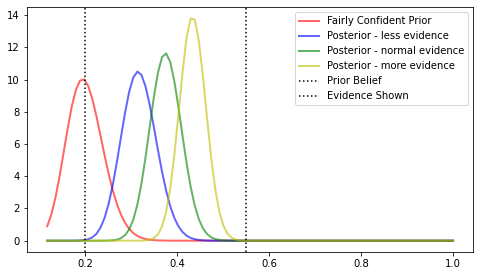

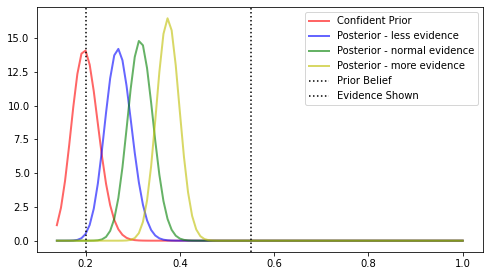

In [ ]:
alphaV, betaV = 4, 16
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(1, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Unconfident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.2, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper right")
plt.show()

alphaV, betaV = 10, 40
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(1, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Fairly Unconfident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.2, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper right")
plt.show()

alphaV, betaV = 20, 80
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(1, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Fairly Confident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.2, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper right")
plt.show()

alphaV, betaV = 40, 160
plt.figure(figsize = (8, 4.5))
x = np.linspace(beta.ppf(0.01, alphaV, betaV), beta.ppf(1, alphaV, betaV), 100)
y1 = beta.pdf(x, alphaV, betaV)
y2 = beta.pdf(x, alphaV + numPrime, betaV + numNotPrime)
y3 = beta.pdf(x, alphaV + numPrime * 0.5, betaV + numNotPrime * 0.5)
y4 = beta.pdf(x, alphaV + numPrime * 2, betaV + numNotPrime * 2)
plt.plot(x, y1, 'r-', lw=2, alpha=0.6, label="Confident Prior")
plt.plot(x, y3, 'b-', lw=2, alpha=0.6, label="Posterior - less evidence")
plt.plot(x, y2, 'g-', lw=2, alpha=0.6, label="Posterior - normal evidence")
plt.plot(x, y4, 'y-', lw=2, alpha=0.6, label="Posterior - more evidence")
plt.axvline(x = 0.2, color = 'k', linestyle = "dotted", label = 'Prior Belief')
plt.axvline(x = numPrime/(numPrime + numNotPrime), color = 'k', linestyle = "dotted", label = 'Evidence Shown')
plt.legend(loc="upper right")
plt.show()